# CIFAR10

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

## Preparación dataset CIFAR10

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

En esta parte se carga el DataSet CIFAR-10, que contiene imágenes con 10 clases diferentes. Luego, se normalizan los valores de píxeles para que estén en el rango [0, 1].

## Validación de datos

In [ ]:
class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'sapo', 'caballo', 'barco', 'camion']

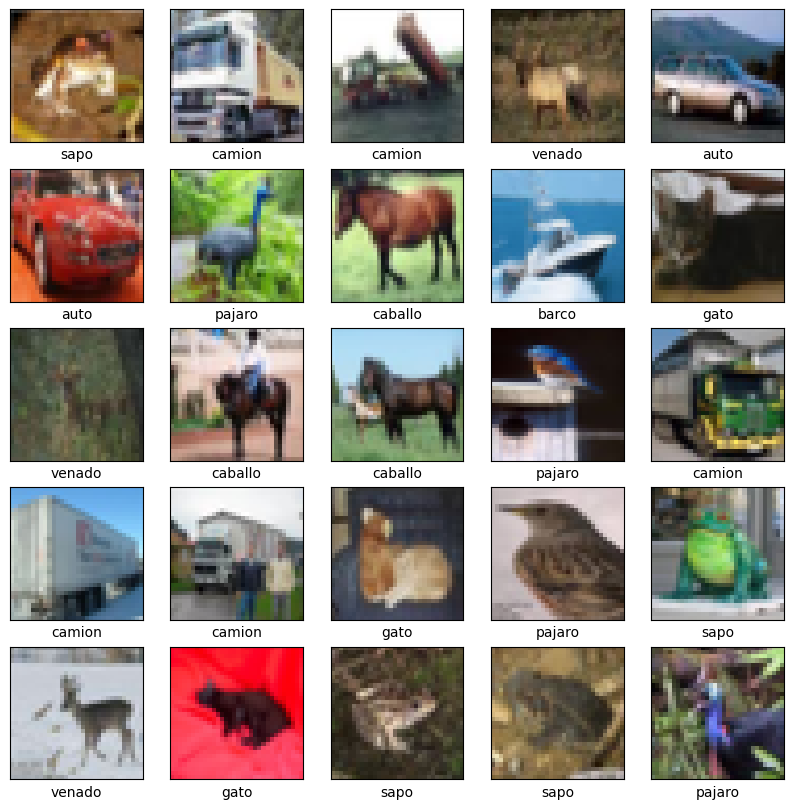

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Capas de convolución

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=3,padding="same", activation="relu", input_shape=[32,32,3]))
model.add(layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))
model.add(layers.Conv2D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(layers.MaxPool2D(pool_size=2,strides=2,padding='valid'))

Aquí se define el modelo secuencial y se agregan dos capas de convolución con activación ReLU, cada una seguida de una capa de MaxPooling para reducir el tamaño de las representaciones de características.

## Arquitectura

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
Total params: 19392 (75.75 KB)
Trainable params: 19392 (75.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Capas densas

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dropout(0.5,noise_shape=None,seed=None))
model.add(layers.Dense(units=128,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout (Dropout)           (None, 4096)              0

Se añade una capa Flatten para convertir la salida de la última capa de convolución en un vector unidimensional. Luego, se agrega una capa Dropout para ayudar a prevenir el sobreajuste, una capa densa con activación ReLU y una capa densa de salida con activación softmax para la clasificación en 10 clases.

## Entrenamiento

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Se compila el modelo utilizando el optimizador 'adam' y la función de pérdida 'sparse_categorical_crossentropy', útil para problemas de clasificación multiclase.

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.0121 - accuracy: 0.6414 - val_loss: 0.9630 - val_accuracy: 0.6635
Epoch 2/10
1563/1563 [==============================] - 98s 62ms/step - loss: 0.9284 - accuracy: 0.6712 - val_loss: 0.9214 - val_accuracy: 0.6826
Epoch 3/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8611 - accuracy: 0.6938 - val_loss: 0.8620 - val_accuracy: 0.7011
Epoch 4/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8051 - accuracy: 0.7152 - val_loss: 0.8388 - val_accuracy: 0.7081
Epoch 5/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.7466 - accuracy: 0.7357 - val_loss: 0.8002 - val_accuracy: 0.7239
Epoch 6/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.7046 - accuracy: 0.7502 - val_loss: 0.7836 - val_accuracy: 0.7238
Epoch 7/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.6773 - accuracy: 0.7634 - val_loss: 0.78

## Evaluación

(0.5, 1.0)

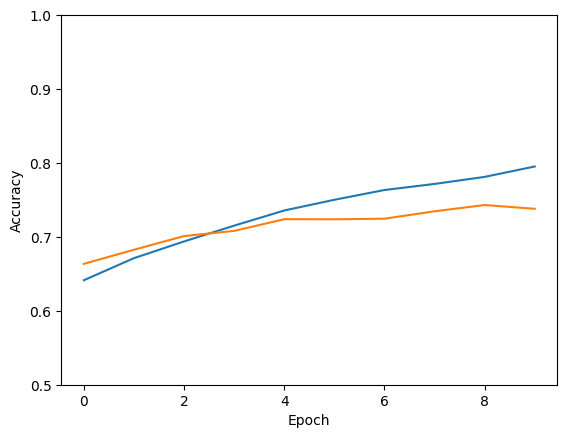

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])

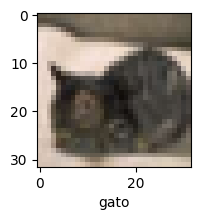

In [ ]:
n = 115
plt.figure(figsize=(2,2))
plt.imshow(test_images[n])
plt.xlabel(class_names[test_labels[n][0]])
plt.show()

In [ ]:
predictions = model.predict(test_images)
print(predictions[n])

313/313 [==============================] - 6s 20ms/step
[4.2202085e-04 3.3526353e-03 2.2189617e-02 5.6994665e-01 1.5451331e-01
 1.6850568e-01 7.1199469e-02 5.7609440e-03 2.6467355e-04 3.8449811e-03]


In [ ]:
import numpy as np

In [ ]:
print("La imagen pertenece al grupo {} con una probabilidad de {:.2f} %".format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

La imagen pertenece al grupo gato con una probabilidad de 56.99 %
